# I 
Suppose a non-life insurance company has responsibility for a portfolio of $J = 1, 000$ policies. Assume further that the number of claims $N$ is Poisson distributed with intensity $μ = 0.05$, and that the claim sizes $Z$ i follow a Pareto with $E(Z_i) = 1.9$ and $sd(Z_i) = 2, 3, 4.$
## Ia) 
__Q:__ Find the parameters $\alpha$ and $\beta$ of the Pareto distribution for each of the three values of $sd(Z_i)$ and plot the probabilitydensity function of each of the three distributions. <br>

__A:__ We use the method of moments. We have given empirical values for the mean and standard deviation. For the Pareto distribution we know that

\begin{align}
    E(Z) = \xi(\alpha, \beta) = \frac{\beta}{\alpha -1}\\
    sd(Z) = \sigma (\alpha, \beta) = E(Z) \sqrt{\frac{\alpha}{\alpha -2}}
\end{align}

Now we match our empirical values, which I will name as $\overline{z}$ and $s$ for the mean and std, with the theoetical values from above

\begin{align}
    \frac{\beta}{\alpha -1}= \overline{Z} \\
    \frac{\beta}{\alpha -1} \sqrt{\frac{\alpha}{\alpha -2}} &= s
\end{align}

These are two equations in two unknown. Solving for the two unknowns gives

\begin{align}
    \alpha &= \frac{2(s/\overline{z})^2}{(\frac{\overline{z}}{s})^2-1} \\
    \beta &= (\alpha -1) \overline{z}
\end{align}

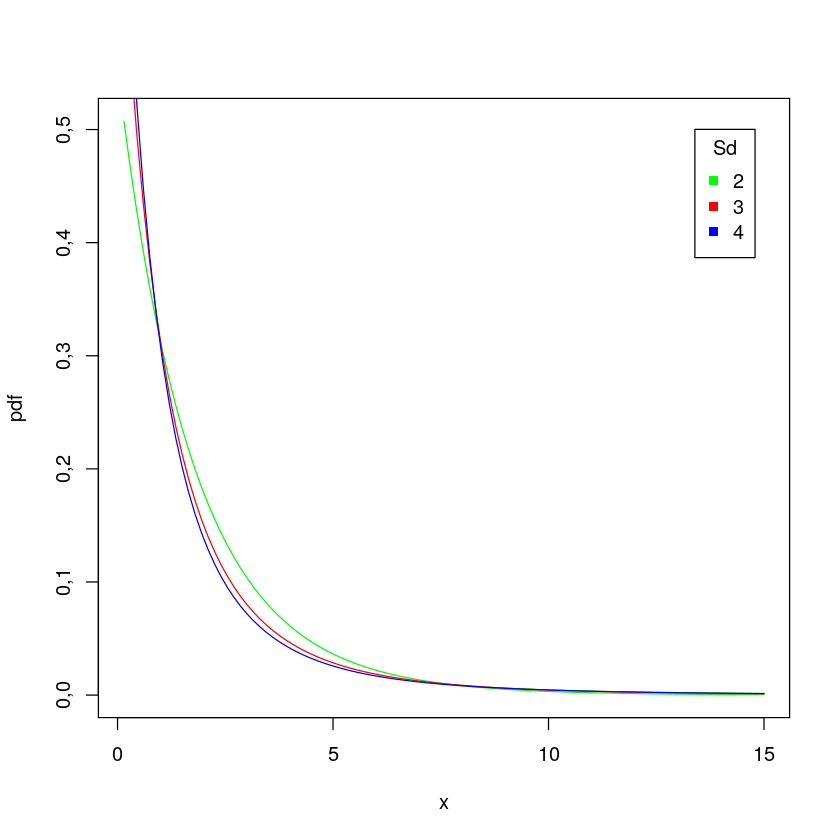

In [61]:
J = 1000
avg = 1.9
sds = c(2,3,4)


pdfPareto = function(avg, sd, x){
    r2 = (sd/avg)^2.
    alpha = 2.*r2/(r2 - 1.)
    beta = (alpha - 1)*avg
    f = (alpha/beta)/(1 + x/beta)^(alpha + 1)
    return(list(alpha, beta, f))
}

colors <- c("green", "red", "blue")
x = 1:100*.15
counter = 1
for (sd in sds){
    out = pdfPareto(avg, sd, x)
    pdf = unlist(out[3])
    if (counter == 1){
        plot(x, pdf, 'l', col=colors[counter])
    }
    else{
        lines(x, pdf, col=colors[counter])
    }
    counter = counter + 1
}
legend("topright", inset=.05, title="Sd", legend=sds, pch=15, col = colors);


Higher std gives more tail weight.

## Ib)
__Q:__ Compute the 95% and 99% reserve for this portfolio for each of the three
sets of parameters.<br>

__A:__

[1] "numSd/exact"      "3,12786167668658" "numMean/exact"    "20,0349219275379"
[1] "qEpsilon"         "2003,93770158546" "2050,05238832784"
[1] "numSd/exact"      "3,94037502282698" "numMean/exact"    "19,9480665284293"
[1] "qEpsilon"         "2055,1570400565"  "2139,19812200773"


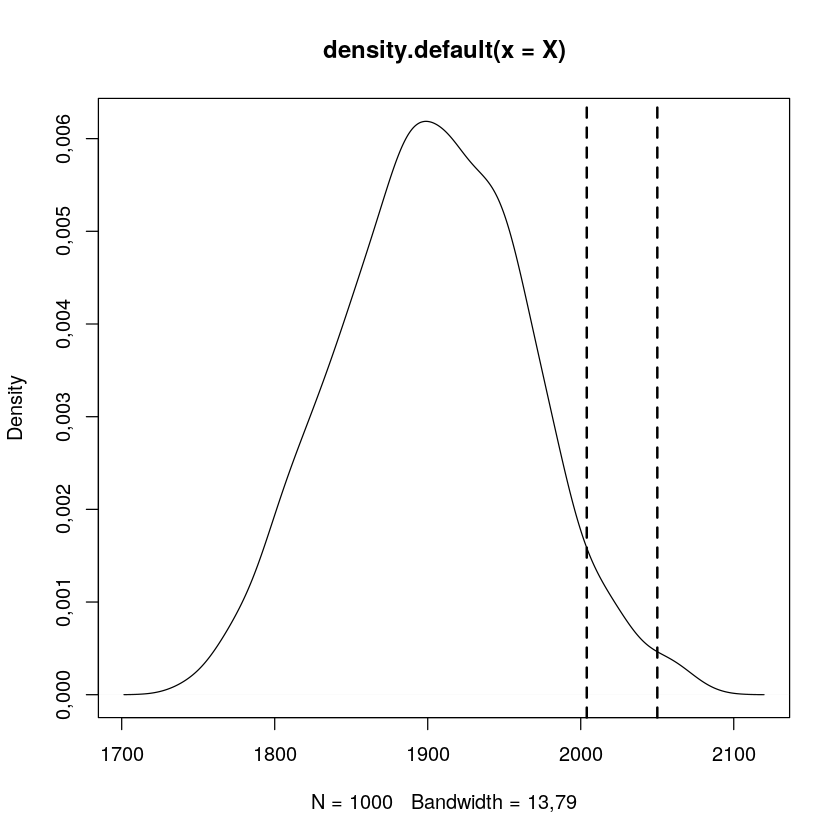

[1] "numSd/exact"      "4,0362521494876"  "numMean/exact"    "20,0250050810887"
[1] "qEpsilon"         "2113,24287802472" "2258,05814438301"


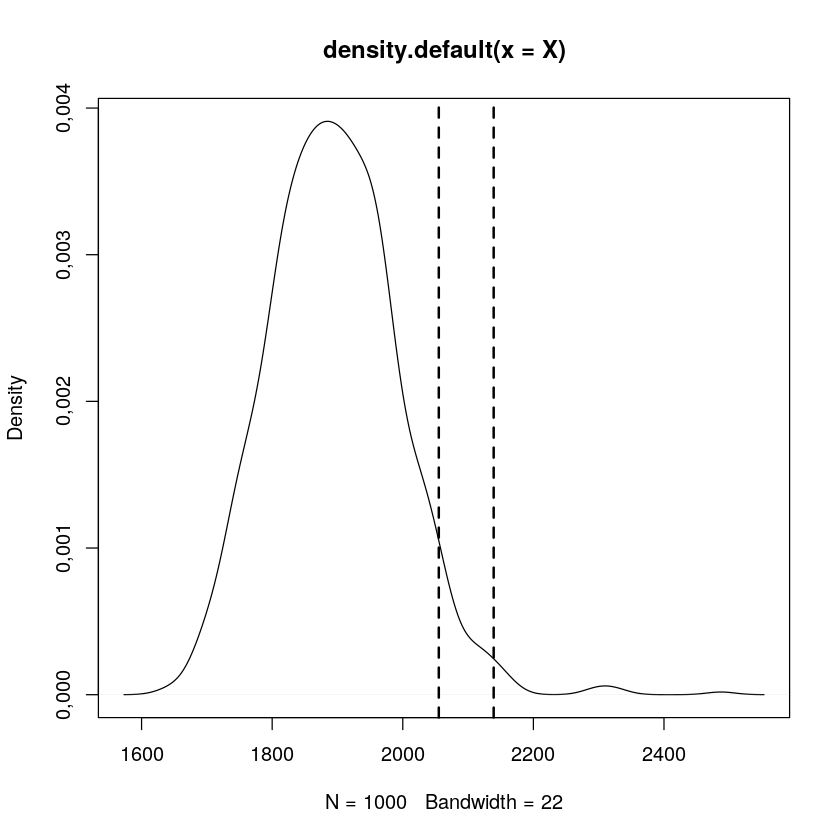

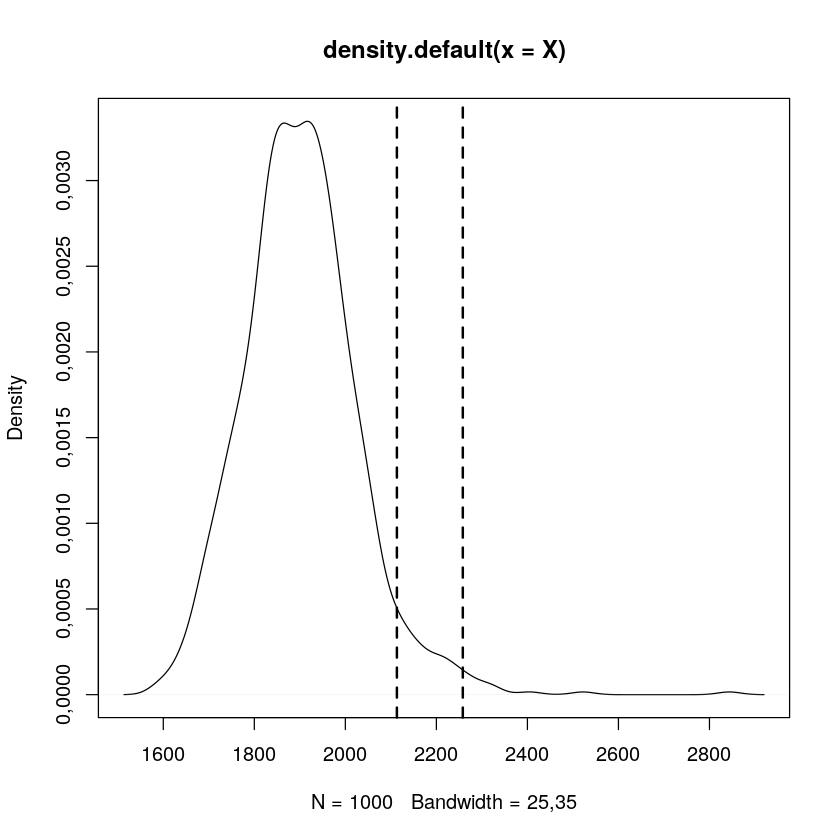

In [6]:
portFolioRisk = function(m, lambda, alpha, beta){
    X = 1:m*0
    N = rpois(m, lambda)
    for (i in 1:m){
        U = runif(m)
        Z = beta*(U**(-1/alpha) - 1)
        X[i] = sum(Z)
    }
    numericalMean = mean(X)
    numericalSd = sd(X)
    exactE = m*lambda*1*beta/(alpha - 1)
    #exactSd = (m*lambda*1*(beta^2/(alpha - 1)^2 + beta^2/(alpha-1)^2*alpha/(alpha-2)))^.5
    exactSd = beta/(alpha-1)*sqrt(m*lambda*1*(2*alpha - 2)/(alpha - 2))
    print(c('numSd/exact',numericalSd/exactSd, 'numMean/exact',numericalMean/exactE))
    return(list(numericalMean, numericalSd, X))
}



alphaBeta = function(avg, sd){
    #alpha = 2/(1-(mean/sd)^2)
    #beta = alpha*mean
    r2 = (sd/avg)^2.
    alpha = 2.*r2/(r2 - 1.)
    beta = (alpha - 1)*avg
    #print(c('alpha, beta: ', alpha, beta))
    return(list(alpha, beta))
}

simulateMultipleSd = function(sds){
    for (sd in sds){
        out = alphaBeta(avg, sd)
        alpha = unlist(out[1])
        #print(alpha)
        beta = unlist(out[2])    
        out = portFolioRisk(m, lambda, alpha, beta)
        meanSim = unlist(out[1])
        sdSim = out[2]
        X = unlist(out[3])

        epsilon = c(0.05, 0.01)
        qEpsilon = sort(X)[(1-epsilon)*m]
        #qEpsilonToMean = qEpsilon/mean
        #print(c('qEpsilon/mean', qEpsilonToMean))
        #print(c('############sd: ', sd, 'alpha', alpha))
        print(c('qEpsilon', qEpsilon))
        plot(density(X))
        abline(v = qEpsilon[1], lty=2, lwd=2)
        abline(v = qEpsilon[2], lty=2, lwd=2)
    }
}

J = 1000
avg = 1.9
sds = c(2.,3.,4.)
m = 1000
lambda = .05
simulateMultipleSd(sds)

Larger sd, larger reserve.

## Ic)
__Q:__
Assume now that parts of the responsibility is ceded to a reinsurer. The
reinsurance contract, which is a layer a × b contact, applies to the individual claims $Z_i$ . Compute the 95% and 99% reserve for the cedent when
$a = 0.5$ and $b = 4$, again for each of the three sets of parameters, and compare to the results from b). Also compute the corresponding reinsurance
premia and comment on the results. <br>

__A:__


In [9]:
reinsurance = function(m, lambda, alpha, beta, a, b){
    X = 1:m*0
    Xre = 1:m*0
    N = rpois(m, lambda)
    for (i in 1:m){
        U = runif(m)
        Z = beta*(U**(-1/alpha) - 1)
        Zre = pmin(pmax(Z-a, 0), b)
        Xre[i] = sum(Zre)
        X[i] = sum(Z - Zre)
    }
    numericalMean = mean(X)
    numericalSd = sd(X)
    reinsurancePremium = mean(Xre)
    return(list(numericalMean, numericalSd, X, reinsurancePremium))
}

simulateMultipleSdCedent = function(sds){
    for (sd in sds){
        out = alphaBeta(avg, sd)
        alpha = unlist(out[1])
        #print(alpha)
        beta = unlist(out[2])    
        out = reinsurance(m, lambda, alpha, beta, a, b)
        meanSim = unlist(out[1])
        sdSim = out[2]
        X = unlist(out[3])
        reinsurancePremium = unlist(out[4])

        epsilon = c(0.05, 0.01)
        qEpsilon = sort(X)[(1-epsilon)*m]
        #qEpsilonToMean = qEpsilon/mean
        #print(c('qEpsilon/mean', qEpsilonToMean))
        #print(c('############sd: ', sd, 'alpha', alpha))
        print(c('95 %, 99% loss: ', qEpsilon))
        print(c('Reinsurance premium: ', reinsurancePremium))
        print(c('Mean loss cedent: ', meanSim))
        #plot(density(X))
        #abline(v = qEpsilon[1], lty=2, lwd=2)
        #abline(v = qEpsilon[2], lty=2, lwd=2)
    }
}

a = 0.5
b = 4

simulateMultipleSdCedent(sds)

[1] "95 %, 99% loss: " "689,796405163617" "708,718096582347"
[1] "Reinsurance premium: " "1257,40378665701"     
[1] "Mean loss cedent: " "638,680290321185"  
[1] "95 %, 99% loss: " "916,428162666622" "988,306274674181"
[1] "Reinsurance premium: " "1108,02539320788"     
[1] "Mean loss cedent: " "791,359505163138"  
[1] "95 %, 99% loss: " "1023,33161567701" "1201,10873121678"
[1] "Reinsurance premium: " "1043,77813069528"     
[1] "Mean loss cedent: " "860,466873715724"  


Reserves are much lower compared to the case without reinsurance. The reserve amounts varies more in the presence of insurance. <br>

The reinusrance premium goes down with sd! <mark> Strange <mark>

# II
Consider a pension that starts at age $l_r = 67$, with $l_0$ the age when the
contract is set up. Further assume that the sum $s = 1.5$ is received at the
start of each year until the age $l_e = 100$. In return, a premium $\pi$ is paid at
the beginning of each year before retirement. A fixed technical rate $r$ is used
for the discounts. The probability of an individual of age $l$ living at least $k$
periods longer is $_k p_l$ , and is assumed to be given by 

\begin{align}
    \log(_k p_l) = \theta_0 k - \frac{\theta_1}{\theta_2} (e^{\theta_2 k} -1) e^{\theta_2 l},
\end{align}

with $\theta_0 = 0.009$, $\theta_1 = 0.000046$ and $\theta_2 = 0.0908$. The expected present value of the cash flow associated with this contract
is then given by

\begin{align}
    V_0 = -\pi \sum_{k=0}^{l_r - l_0 - 1} d^k\; _k p_{l_0} + s \sum_{k = l_r - l_0}^{l_e - l_0} d^k\; _k p_{l_0}
\end{align}

The corresponding equivalence premium, obtained by setting $V_0 = 0$, is

\begin{align}
    \pi = s \frac{\sum_{k = l_r - l_0}^{l_e - l_0} d^k\;_k p_{l_0}}{\sum_{k=0}^{l_r - l_0 -1} d^k\;_k p_{l_0}}
\end{align}

## a)
__Q:__ Assume first that $r = 2\text{%}$. Compute the equivalence premium π for the
values 30, 40, 50, 60 for $l_0$ and comment on the results. <br>

__A:__

[1] 38939,1


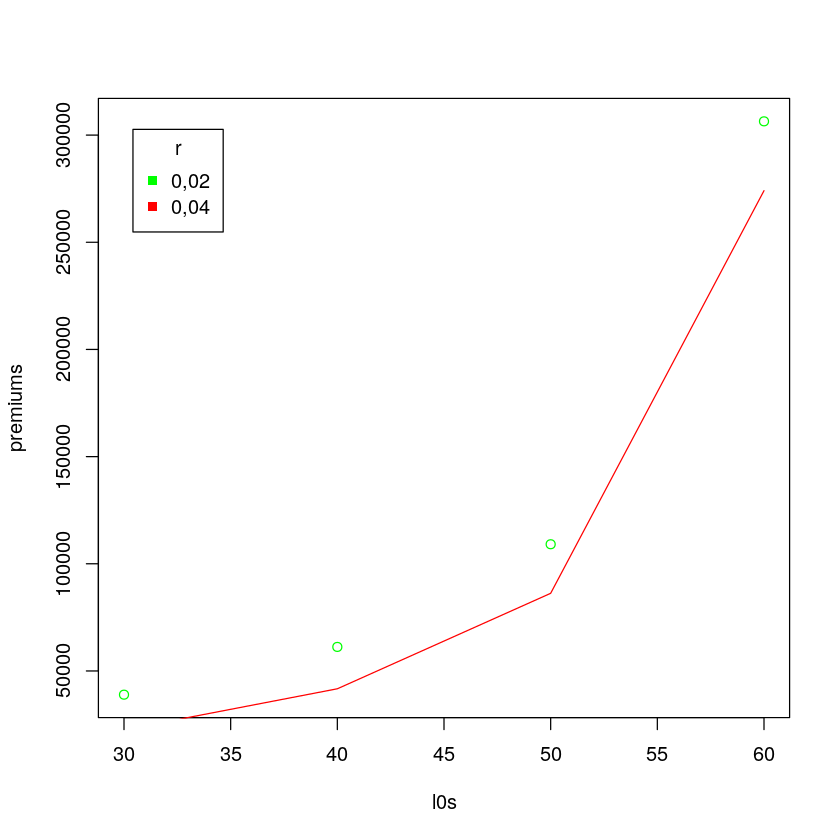

In [31]:
premium = function(lr, l0, s, le, r){
    theta0 = .009
    theta1 = .000046
    theta2 = .0908
    d = 1./(1+r)
    
    numerator = 0
    l = l0
    for (k in (lr - l0):(le - l0)){
        logP = -theta0*k - theta1/theta2*(exp(theta2*k) - 1)*exp(theta2*l)
        numerator = numerator + d^k*exp(logP)
        l = l +1
    numerator = s*numerator
    }        
    
    denominator = 0
    l = l0
    for (k in (0):(lr - l0 -1)){
        logP = -theta0*k - theta1/theta2*(exp(theta2*k) - 1)*exp(theta2*l)
        denominator = denominator + d^k*exp(logP)
        l = l +1
    }    
    
    pi = numerator/denominator
    return(pi)
}

simulatePension = function(rs, l0s){
    colors <- c("green", "red", "blue")
    rNumber = 1
    for (r in rs){
        premiums = rep(0, length(l0s))
        counter = 1
        #print(c('r: ', r))
        for (l0 in l0s){
            #print(c('l0: ', l0))
            pi = premium(lr, l0, s, le, r)
            #print(c('pi: ', pi))
            premiums[counter] = pi
            counter = counter + 1
        }
        if (rNumber == 1){
            plot(l0s, premiums,  col=colors[rNumber])
        }
        else{
            lines(l0s, premiums, col=colors[rNumber])
        }
        rNumber = rNumber + 1
    }
    legend("topleft", inset=.05, title="r", legend=rs, pch=15, col = colors);
}

lr = 67
s = 1.5
le = 100
rs = c(.02, .04)
l0s = c(30, 40, 50, 60)


r = .02
l0 = 30

out = premium(lr, l0, s, le, r)
print(out)

simulatePension(rs, l0s)

Premiums increase with age of person at the time when the contract is set up. This reflects the fact that there will be fewer years for this person to pay before he or she receives the pension. <br>

The premium is reduced with the tecnical rate. The value of future payment streams is reduced with higher technical rate. Hence the premium is reduced to obtain break even.